## 配对交易策略 Pair Trading

In [1]:
import pandas as pd
import numpy as np
import tushare as ts
import seaborn
%matplotlib inline
from matplotlib import pyplot as plt
stocks_pair = ['600199', '600702']

### 1. 数据准备 & 回测准备

In [2]:
data1 = ts.get_k_data('600199', '2013-06-01', '2014-12-31')[['date','close']]
data1.head()

,date,close
96,2013-06-03,15.505
97,2013-06-04,14.880
98,2013-06-05,15.043
99,2013-06-06,14.668
100,2013-06-07,14.245


In [3]:
data2 = ts.get_k_data('600702', '2013-06-01', '2014-12-31')['close']
data2.head()

96     17.346
97     16.956
98     17.170
99     16.868
100    16.634
Name: close, dtype: float64

In [4]:
data = pd.concat([data1, data2], axis=1)                 #拼接，把两张表格的数据拼接起来；
data.head()

,date,close,close
96,2013-06-03,15.505,17.346
97,2013-06-04,14.880,16.956
98,2013-06-05,15.043,17.170
99,2013-06-06,14.668,16.868
100,2013-06-07,14.245,16.634


In [5]:
data.set_index('date',inplace = True)
data.columns = stocks_pair
data.head()

,600199,600702
date,,
2013-06-03,15.505,17.346
2013-06-04,14.880,16.956
2013-06-05,15.043,17.170
2013-06-06,14.668,16.868
2013-06-07,14.245,16.634


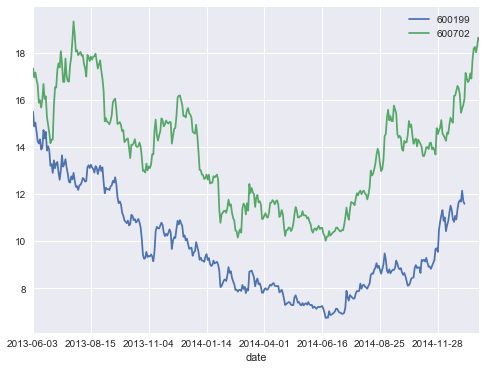

In [6]:
data.plot(figsize= (8,6))

### 2. 策略开发思路

In [ ]:
# data['pair_ratio'] =data[stocks_pair[0]]/data[stocks_pair[1]]
# mean = data['pair_ratio'].mean()
# std = data['pair_ratio'].std()
# data['ratio_mean'] = mean
# data['ratio_ceiling'] = mean + std
# data['ratio_floor'] = mean - std

In [7]:
data['priceDelta']=data['600199']-data['600702']

In [8]:
data.head()

,600199,600702,priceDelta
date,,,
2013-06-03,15.505,17.346,-1.841
2013-06-04,14.880,16.956,-2.076
2013-06-05,15.043,17.170,-2.127
2013-06-06,14.668,16.868,-2.200
2013-06-07,14.245,16.634,-2.389


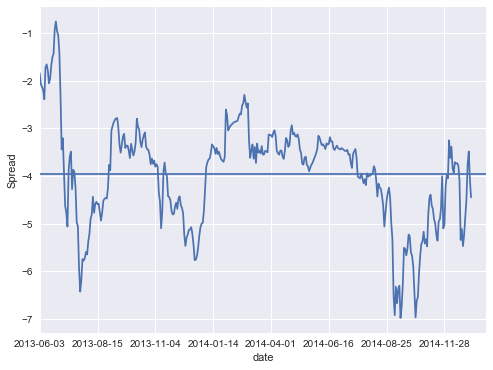

In [9]:
data['priceDelta'].plot(figsize= (8,6))
plt.ylabel('Spread')
plt.axhline(data['priceDelta'].mean())

In [10]:
data['zscore'] = (data['priceDelta'] - np.mean(data['priceDelta']))/np.std(data['priceDelta'])     #价差的标准化；

In [12]:
data.head(20)

,600199,600702,priceDelta,zscore
date,,,,
2013-06-03,15.505,17.346,-1.841,1.962748
2013-06-04,14.880,16.956,-2.076,1.745896
2013-06-05,15.043,17.170,-2.127,1.698834
2013-06-06,14.668,16.868,-2.200,1.631471
2013-06-07,14.245,16.634,-2.389,1.457067
2013-06-13,14.158,15.883,-1.725,2.069790
2013-06-14,14.332,15.990,-1.658,2.131616
2013-06-17,13.899,15.678,-1.779,2.019960
2013-06-18,13.966,16.020,-2.054,1.766197


In [14]:
data[data['zscore'] < - 1.5].head()

,600199,600702,priceDelta,zscore
date,,,,
2013-07-24,12.631,18.540,-5.909,-1.791107
2013-07-25,12.907,19.336,-6.429,-2.270951
2013-07-26,12.582,18.769,-6.187,-2.047639
2013-07-29,12.317,18.063,-5.746,-1.640694
2013-07-30,12.336,18.113,-5.777,-1.669300


In [15]:
len(data[data['zscore'] < - 1.5])

30

In [16]:
data['position_1'] = np.where(data['zscore'] > 1.5, -1, np.nan)
data['position_1'] = np.where(data['zscore'] < -1.5, 1, data['position_1'])
data['position_1'] = np.where(abs(data['zscore']) < 0.5, 0, data['position_1'])

In [17]:
data.head(50)

,600199,600702,priceDelta,zscore,position_1
date,,,,,
2013-06-03,15.505,17.346,-1.841,1.962748,-1.0
2013-06-04,14.880,16.956,-2.076,1.745896,-1.0
2013-06-05,15.043,17.170,-2.127,1.698834,-1.0
2013-06-06,14.668,16.868,-2.200,1.631471,-1.0
2013-06-07,14.245,16.634,-2.389,1.457067,NaN
2013-06-13,14.158,15.883,-1.725,2.069790,-1.0
2013-06-14,14.332,15.990,-1.658,2.131616,-1.0
2013-06-17,13.899,15.678,-1.779,2.019960,-1.0
2013-06-18,13.966,16.020,-2.054,1.766197,-1.0


#### 产生交易信号

In [18]:
data['position_1'] = data['position_1'].fillna(method = 'ffill')

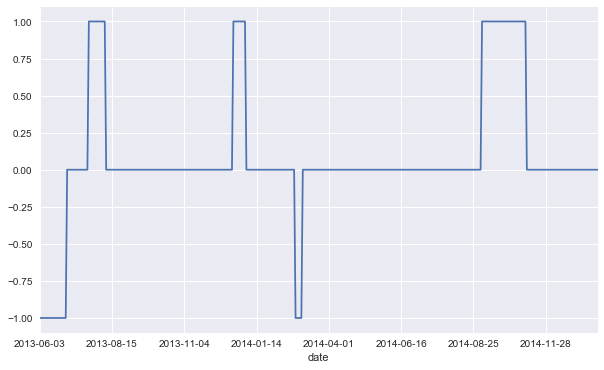

In [20]:
data['position_1'].plot(ylim=[-1.1, 1.1], figsize=(10, 6))

In [21]:
data['position_2'] = -np.sign(data['position_1'])

In [22]:
data.head(20)

,600199,600702,priceDelta,zscore,position_1,position_2
date,,,,,,
2013-06-03,15.505,17.346,-1.841,1.962748,-1.0,1.0
2013-06-04,14.880,16.956,-2.076,1.745896,-1.0,1.0
2013-06-05,15.043,17.170,-2.127,1.698834,-1.0,1.0
2013-06-06,14.668,16.868,-2.200,1.631471,-1.0,1.0
2013-06-07,14.245,16.634,-2.389,1.457067,-1.0,1.0
2013-06-13,14.158,15.883,-1.725,2.069790,-1.0,1.0
2013-06-14,14.332,15.990,-1.658,2.131616,-1.0,1.0
2013-06-17,13.899,15.678,-1.779,2.019960,-1.0,1.0
2013-06-18,13.966,16.020,-2.054,1.766197,-1.0,1.0


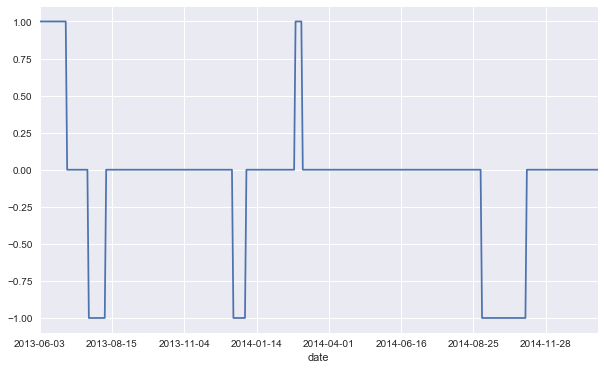

In [23]:
data['position_2'].plot(ylim=[-1.1, 1.1], figsize=(10, 6))

### 3. 计算策略年化收益并可视化

In [24]:
data['returns_1'] = np.log(data['600199'] / data['600199'].shift(1))

In [25]:
data['returns_2'] = np.log(data['600702'] / data['600702'].shift(1))

In [26]:
data.head(20)

,600199,600702,priceDelta,zscore,position_1,position_2,returns_1,returns_2
date,,,,,,,,
2013-06-03,15.505,17.346,-1.841,1.962748,-1.0,1.0,NaN,NaN
2013-06-04,14.880,16.956,-2.076,1.745896,-1.0,1.0,-0.041145,-0.022740
2013-06-05,15.043,17.170,-2.127,1.698834,-1.0,1.0,0.010895,0.012542
2013-06-06,14.668,16.868,-2.200,1.631471,-1.0,1.0,-0.025245,-0.017745
2013-06-07,14.245,16.634,-2.389,1.457067,-1.0,1.0,-0.029262,-0.013970
2013-06-13,14.158,15.883,-1.725,2.069790,-1.0,1.0,-0.006126,-0.046199
2013-06-14,14.332,15.990,-1.658,2.131616,-1.0,1.0,0.012215,0.006714
2013-06-17,13.899,15.678,-1.779,2.019960,-1.0,1.0,-0.030678,-0.019705
2013-06-18,13.966,16.020,-2.054,1.766197,-1.0,1.0,0.004809,0.021579


In [27]:
data['strategy'] = 0.5*(data['position_1'].shift(1) * data['returns_1'])+0.5*(data['position_2'].shift(1) * data['returns_2'])

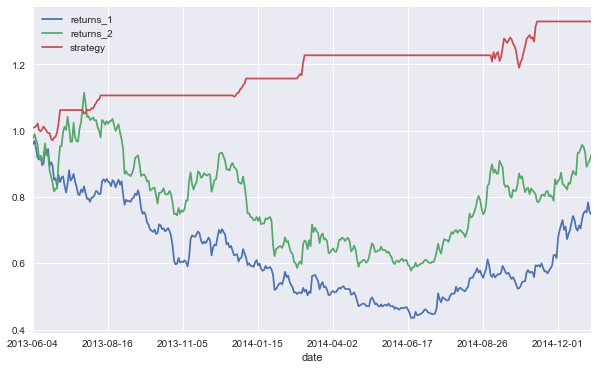

In [28]:
data[['returns_1','returns_2','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

声明：本资料仅限内部研究和交流使用，切勿外传。